In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import colors as cls
import time
import pathlib
import gc
## Using uproot3 for now, it would be a good idea to update to 4 later
import uproot3

In [2]:
## Want PIDSubs?
withPIDSubs = False

## Save plots?
save_plots = True

## Polarity
polarity = +1

## Root files
rootFileFolder = str(pathlib.Path.home()) + '/data/interpolateOnlyLongTracks/'
falseRootFile = rootFileFolder + 'Lb2JPsiL_Run2_Sim_2016_MagUp_v12_InterpolateFalse.root'
trueRootFile = rootFileFolder + 'Lb2JPsiL_Run2_Sim_2016_MagUp_v12_InterpolateTrue.root'

# Import data

In [3]:
## These are the desired variables to keep
recoBranches = [
    'Lb_ENDVERTEX_X',
    'Lb_ENDVERTEX_Y',
    'Lb_ENDVERTEX_Z',
    'L_ENDVERTEX_X',
    'L_ENDVERTEX_Y',
    'L_ENDVERTEX_Z',
    'Jpsi_ENDVERTEX_X',
    'Jpsi_ENDVERTEX_Y',
    'Jpsi_ENDVERTEX_Z',
    'L_PX',
    'L_PY',
    'L_PZ',
    'Lb_PX',
    'Lb_PY',
    'Lb_PZ',
    'Jpsi_PX',
    'Jpsi_PY',
    'Jpsi_PZ',
    'p_PX',
    'p_PY',
    'p_PZ',
    'pim_PX',
    'pim_PY',
    'pim_PZ',
    'mum_PX',
    'mum_PY',
    'mum_PZ',
    'mup_PX',
    'mup_PY',
    'mup_PZ',
    'Lb_ID',
    'L_ID',
    'Jpsi_ID',
    'mum_ID',
    'mup_ID',
    'p_ID',
    'pim_ID',
    'L_M',
    'L_MM',
    'Lb_M',
    'Lb_MM',
    'Jpsi_M',
    'Jpsi_MM',
    'Lb_BPVDIRA',
    'Lb_BPVIPCHI2',
    'Lb_BPVVDCHI2',
    'Lb_VFASPF_CHI2_VDOF',
    'L_BPVDIRA',
    'L_BPVIPCHI2',
    'L_BPVVDCHI2',
    'L_VFASPF_CHI2_VDOF',
    'Lb_OWNPV_X',
    'Lb_OWNPV_Y',
    'Lb_OWNPV_Z',
    'Lb_OWNPV_CHI2',
    'Lb_OWNPV_NDOF',
    'Lb_DTF_FixJPsi_status',
    'Lb_DTF_FixJPsi_M',
    'Lb_DTF_FixJPsi_P',
    'Lb_DTF_FixJPsi_chi2',
    'Lb_DTF_FixJPsi_nDOF',
    'Lb_DTF_FixJPsi_PV_key',
    'Lb_DTF_FixJPsi_PV_X',
    'Lb_DTF_FixJPsi_PV_Y',
    'Lb_DTF_FixJPsi_PV_Z',
    'Lb_DTF_FixJPsi_Lambda0_M',
    'Lb_DTF_FixJPsi_Lambda0_P',
    'Lb_DTF_FixJPsi_Lambda0_decayLength',
    'Lb_DTF_FixJPsi_Lambda0_piplus_PX',
    'Lb_DTF_FixJPsi_Lambda0_piplus_PY',
    'Lb_DTF_FixJPsi_Lambda0_piplus_PZ',
    'Lb_DTF_FixJPsi_Lambda0_pplus_PX',
    'Lb_DTF_FixJPsi_Lambda0_pplus_PY',
    'Lb_DTF_FixJPsi_Lambda0_pplus_PZ',
    'Lb_DTF_FixJPsi_J_psi_1S_muminus_0_PX',
    'Lb_DTF_FixJPsi_J_psi_1S_muminus_0_PY',
    'Lb_DTF_FixJPsi_J_psi_1S_muminus_0_PZ',
    'Lb_DTF_FixJPsi_J_psi_1S_muminus_PX',
    'Lb_DTF_FixJPsi_J_psi_1S_muminus_PY',
    'Lb_DTF_FixJPsi_J_psi_1S_muminus_PZ',
    'Lb_DTF_FixJPsiLambda_status',
    'Lb_DTF_FixJPsiLambda_M',
    'Lb_DTF_FixJPsiLambda_P',
    'Lb_DTF_FixJPsiLambda_chi2',
    'Lb_DTF_FixJPsiLambda_nDOF',
    'Lb_DTF_FixJPsiLambda_PV_key',
    'Lb_DTF_FixJPsiLambda_PV_X',
    'Lb_DTF_FixJPsiLambda_PV_Y',
    'Lb_DTF_FixJPsiLambda_PV_Z',
    'Lb_DTF_FixJPsiLambda_Lambda0_M',
    'Lb_DTF_FixJPsiLambda_Lambda0_P',
    'Lb_DTF_FixJPsiLambda_Lambda0_decayLength',
    'Lb_DTF_FixJPsiLambda_Lambda0_piplus_PX',
    'Lb_DTF_FixJPsiLambda_Lambda0_piplus_PY',
    'Lb_DTF_FixJPsiLambda_Lambda0_piplus_PZ',
    'Lb_DTF_FixJPsiLambda_Lambda0_pplus_PX',
    'Lb_DTF_FixJPsiLambda_Lambda0_pplus_PY',
    'Lb_DTF_FixJPsiLambda_Lambda0_pplus_PZ',
    'Lb_DTF_FixJPsiLambda_J_psi_1S_muminus_0_PX',
    'Lb_DTF_FixJPsiLambda_J_psi_1S_muminus_0_PY',
    'Lb_DTF_FixJPsiLambda_J_psi_1S_muminus_0_PZ',
    'Lb_DTF_FixJPsiLambda_J_psi_1S_muminus_PX',
    'Lb_DTF_FixJPsiLambda_J_psi_1S_muminus_PY',
    'Lb_DTF_FixJPsiLambda_J_psi_1S_muminus_PZ'
]

if withPIDSubs:
    PIDSubsBranches = [
        'Lb_DTF_FixJPsi_PIDSubs_status',
        'Lb_DTF_FixJPsi_PIDSubs_M',
        'Lb_DTF_FixJPsi_PIDSubs_P',
        'Lb_DTF_FixJPsi_PIDSubs_chi2',
        'Lb_DTF_FixJPsi_PIDSubs_nDOF',
        'Lb_DTF_FixJPsi_PIDSubs_PV_key',
        'Lb_DTF_FixJPsi_PIDSubs_PV_X',
        'Lb_DTF_FixJPsi_PIDSubs_PV_Y',
        'Lb_DTF_FixJPsi_PIDSubs_PV_Z',
        'Lb_DTF_FixJPsi_PIDSubs_Lambda0_M',
        'Lb_DTF_FixJPsi_PIDSubs_Lambda0_P',
        'Lb_DTF_FixJPsi_PIDSubs_Lambda0_decayLength',
        'Lb_DTF_FixJPsi_PIDSubs_Lambda0_piplus_PX',
        'Lb_DTF_FixJPsi_PIDSubs_Lambda0_piplus_PY',
        'Lb_DTF_FixJPsi_PIDSubs_Lambda0_piplus_PZ',
        'Lb_DTF_FixJPsi_PIDSubs_Lambda0_pplus_PX',
        'Lb_DTF_FixJPsi_PIDSubs_Lambda0_pplus_PY',
        'Lb_DTF_FixJPsi_PIDSubs_Lambda0_pplus_PZ',
        'Lb_DTF_FixJPsi_PIDSubs_J_psi_1S_muminus_0_PX',
        'Lb_DTF_FixJPsi_PIDSubs_J_psi_1S_muminus_0_PY',
        'Lb_DTF_FixJPsi_PIDSubs_J_psi_1S_muminus_0_PZ',
        'Lb_DTF_FixJPsi_PIDSubs_J_psi_1S_muminus_PX',
        'Lb_DTF_FixJPsi_PIDSubs_J_psi_1S_muminus_PY',
        'Lb_DTF_FixJPsi_PIDSubs_J_psi_1S_muminus_PZ',
        'Lb_DTF_FixJPsiLambda_PIDSubs_status',
        'Lb_DTF_FixJPsiLambda_PIDSubs_M',
        'Lb_DTF_FixJPsiLambda_PIDSubs_P',
        'Lb_DTF_FixJPsiLambda_PIDSubs_chi2',
        'Lb_DTF_FixJPsiLambda_PIDSubs_nDOF',
        'Lb_DTF_FixJPsiLambda_PIDSubs_PV_key',
        'Lb_DTF_FixJPsiLambda_PIDSubs_PV_X',
        'Lb_DTF_FixJPsiLambda_PIDSubs_PV_Y',
        'Lb_DTF_FixJPsiLambda_PIDSubs_PV_Z',
        'Lb_DTF_FixJPsiLambda_PIDSubs_Lambda0_M',
        'Lb_DTF_FixJPsiLambda_PIDSubs_Lambda0_P',
        'Lb_DTF_FixJPsiLambda_PIDSubs_Lambda0_decayLength',
        'Lb_DTF_FixJPsiLambda_PIDSubs_Lambda0_piplus_PX',
        'Lb_DTF_FixJPsiLambda_PIDSubs_Lambda0_piplus_PY',
        'Lb_DTF_FixJPsiLambda_PIDSubs_Lambda0_piplus_PZ',
        'Lb_DTF_FixJPsiLambda_PIDSubs_Lambda0_pplus_PX',
        'Lb_DTF_FixJPsiLambda_PIDSubs_Lambda0_pplus_PY',
        'Lb_DTF_FixJPsiLambda_PIDSubs_Lambda0_pplus_PZ',
        'Lb_DTF_FixJPsiLambda_PIDSubs_J_psi_1S_muminus_0_PX',
        'Lb_DTF_FixJPsiLambda_PIDSubs_J_psi_1S_muminus_0_PY',
        'Lb_DTF_FixJPsiLambda_PIDSubs_J_psi_1S_muminus_0_PZ',
        'Lb_DTF_FixJPsiLambda_PIDSubs_J_psi_1S_muminus_PX',
        'Lb_DTF_FixJPsiLambda_PIDSubs_J_psi_1S_muminus_PY',
        'Lb_DTF_FixJPsiLambda_PIDSubs_J_psi_1S_muminus_PZ',
        'TrackType'
    ]
else:
    PIDSubsBranches = []
    
truthBranches = [
    'Lb_TRUEENDVERTEX_X',
    'Lb_TRUEENDVERTEX_Y',
    'Lb_TRUEENDVERTEX_Z',
    'L_TRUEENDVERTEX_X',
    'L_TRUEENDVERTEX_Y',
    'L_TRUEENDVERTEX_Z',
    'p_TRUEP_X',
    'p_TRUEP_Y',
    'p_TRUEP_Z',
    'pim_TRUEP_X',
    'pim_TRUEP_Y',
    'pim_TRUEP_Z',
    'mum_TRUEP_X',
    'mum_TRUEP_Y',
    'mum_TRUEP_Z',
    'mup_TRUEP_X',
    'mup_TRUEP_Y',
    'mup_TRUEP_Z',
    'L_MC_MOTHER_ID',
    'pim_MC_MOTHER_ID',
    'Lb_Reconstructible',
    'L_Reconstructible',
    'p_Reconstructible',
    'pim_Reconstructible',
    'Jpsi_Reconstructible',
    'mup_Reconstructible',
    'mum_Reconstructible',
    'Lb_Reconstructed',
    'L_Reconstructed',
    'p_Reconstructed',
    'pim_Reconstructed',
    'Jpsi_Reconstructed',
    'mup_Reconstructed',
    'mum_Reconstructed'
]

branches = recoBranches + truthBranches + PIDSubsBranches

In [4]:
## This is how we rename them according to the Salvatore convention
## Assumed here that muminus_0 is mum and muminus is mup.
## Otherwise the order is kept, so it makes sense.
## These are the desired variables to keep
recoBranches_newNames = [
    'Lb_ENDVERTEX_X',
    'Lb_ENDVERTEX_Y',
    'Lb_ENDVERTEX_Z',
    'L_ENDVERTEX_X',
    'L_ENDVERTEX_Y',
    'L_ENDVERTEX_Z',
    'Jpsi_ENDVERTEX_X',
    'Jpsi_ENDVERTEX_Y',
    'Jpsi_ENDVERTEX_Z',
    'L_PX',
    'L_PY',
    'L_PZ',
    'Lb_PX',
    'Lb_PY',
    'Lb_PZ',
    'Jpsi_PX',
    'Jpsi_PY',
    'Jpsi_PZ',
    'p_PX',
    'p_PY',
    'p_PZ',
    'pim_PX',
    'pim_PY',
    'pim_PZ',
    'mum_PX',
    'mum_PY',
    'mum_PZ',
    'mup_PX',
    'mup_PY',
    'mup_PZ',
    'Lb_ID',
    'L_ID',
    'Jpsi_ID',
    'mum_ID',
    'mup_ID',
    'p_ID',
    'pim_ID',
    'L_M',
    'L_MM',
    'Lb_M',
    'Lb_MM',
    'Jpsi_M',
    'Jpsi_MM',
    'Lb_BPVDIRA',
    'Lb_BPVIPCHI2',
    'Lb_BPVVDCHI2',
    'Lb_VFASPF_CHI2_VDOF',
    'L_BPVDIRA',
    'L_BPVIPCHI2',
    'L_BPVVDCHI2',
    'L_VFASPF_CHI2_VDOF',
    'Lb_OWNPV_X',
    'Lb_OWNPV_Y',
    'Lb_OWNPV_Z',
    'Lb_OWNPV_CHI2',
    'Lb_OWNPV_NDOF',
    'DTF_FixJPsi_status',
    'DTF_FixJPsi_Lb_M',
    'DTF_FixJPsi_Lb_P',
    'DTF_FixJPsi_chi2',
    'DTF_FixJPsi_nDOF',
    'DTF_FixJPsi_PV_key',
    'DTF_FixJPsi_PV_X',
    'DTF_FixJPsi_PV_Y',
    'DTF_FixJPsi_PV_Z',
    'DTF_FixJPsi_L_M',
    'DTF_FixJPsi_L_P',
    'DTF_FixJPsi_L_decayLength',
    'DTF_FixJPsi_pim_PX',
    'DTF_FixJPsi_pim_PY',
    'DTF_FixJPsi_pim_PZ',
    'DTF_FixJPsi_p_PX',
    'DTF_FixJPsi_p_PY',
    'DTF_FixJPsi_p_PZ',
    'DTF_FixJPsi_mum_PX',
    'DTF_FixJPsi_mum_PY',
    'DTF_FixJPsi_mum_PZ',
    'DTF_FixJPsi_mup_PX',
    'DTF_FixJPsi_mup_PY',
    'DTF_FixJPsi_mup_PZ',
    'DTF_FixJPsiLambda_status',
    'DTF_FixJPsiLambda_Lb_M',
    'DTF_FixJPsiLambda_Lb_P',
    'DTF_FixJPsiLambda_chi2',
    'DTF_FixJPsiLambda_nDOF',
    'DTF_FixJPsiLambda_PV_key',
    'DTF_FixJPsiLambda_PV_X',
    'DTF_FixJPsiLambda_PV_Y',
    'DTF_FixJPsiLambda_PV_Z',
    'DTF_FixJPsiLambda_L_M',
    'DTF_FixJPsiLambda_L_P',
    'DTF_FixJPsiLambda_L_decayLength',
    'DTF_FixJPsiLambda_pim_PX',
    'DTF_FixJPsiLambda_pim_PY',
    'DTF_FixJPsiLambda_pim_PZ',
    'DTF_FixJPsiLambda_p_PX',
    'DTF_FixJPsiLambda_p_PY',
    'DTF_FixJPsiLambda_p_PZ',
    'DTF_FixJPsiLambda_mum_PX',
    'DTF_FixJPsiLambda_mum_PY',
    'DTF_FixJPsiLambda_mum_PZ',
    'DTF_FixJPsiLambda_mup_PX',
    'DTF_FixJPsiLambda_mup_PY',
    'DTF_FixJPsiLambda_mup_PZ'
]

if withPIDSubs:
    PIDSubsBranches_newNames = [
        'DTF_FixJPsi_PIDSubs_status',
        'DTF_FixJPsi_PIDSubs_Lb_M',
        'DTF_FixJPsi_PIDSubs_Lb_P',
        'DTF_FixJPsi_PIDSubs_chi2',
        'DTF_FixJPsi_PIDSubs_nDOF',
        'DTF_FixJPsi_PIDSubs_PV_key',
        'DTF_FixJPsi_PIDSubs_PV_X',
        'DTF_FixJPsi_PIDSubs_PV_Y',
        'DTF_FixJPsi_PIDSubs_PV_Z',
        'DTF_FixJPsi_PIDSubs_L_M',
        'DTF_FixJPsi_PIDSubs_L_P',
        'DTF_FixJPsi_PIDSubs_L_decayLength',
        'DTF_FixJPsi_PIDSubs_pim_PX',
        'DTF_FixJPsi_PIDSubs_pim_PY',
        'DTF_FixJPsi_PIDSubs_pim_PZ',
        'DTF_FixJPsi_PIDSubs_p_PX',
        'DTF_FixJPsi_PIDSubs_p_PY',
        'DTF_FixJPsi_PIDSubs_p_PZ',
        'DTF_FixJPsi_PIDSubs_mum_PX',
        'DTF_FixJPsi_PIDSubs_mum_PY',
        'DTF_FixJPsi_PIDSubs_mum_PZ',
        'DTF_FixJPsi_PIDSubs_mup_PX',
        'DTF_FixJPsi_PIDSubs_mup_PY',
        'DTF_FixJPsi_PIDSubs_mup_PZ',
        'DTF_FixJPsiLambda_PIDSubs_status',
        'DTF_FixJPsiLambda_PIDSubs_Lb_M',
        'DTF_FixJPsiLambda_PIDSubs_Lb_P',
        'DTF_FixJPsiLambda_PIDSubs_chi2',
        'DTF_FixJPsiLambda_PIDSubs_nDOF',
        'DTF_FixJPsiLambda_PIDSubs_PV_key',
        'DTF_FixJPsiLambda_PIDSubs_PV_X',
        'DTF_FixJPsiLambda_PIDSubs_PV_Y',
        'DTF_FixJPsiLambda_PIDSubs_PV_Z',
        'DTF_FixJPsiLambda_PIDSubs_L_M',
        'DTF_FixJPsiLambda_PIDSubs_L_P',
        'DTF_FixJPsiLambda_PIDSubs_L_decayLength',
        'DTF_FixJPsiLambda_PIDSubs_pim_PX',
        'DTF_FixJPsiLambda_PIDSubs_pim_PY',
        'DTF_FixJPsiLambda_PIDSubs_pim_PZ',
        'DTF_FixJPsiLambda_PIDSubs_p_PX',
        'DTF_FixJPsiLambda_PIDSubs_p_PY',
        'DTF_FixJPsiLambda_PIDSubs_p_PZ',
        'DTF_FixJPsiLambda_PIDSubs_mum_PX',
        'DTF_FixJPsiLambda_PIDSubs_mum_PY',
        'DTF_FixJPsiLambda_PIDSubs_mum_PZ',
        'DTF_FixJPsiLambda_PIDSubs_mup_PX',
        'DTF_FixJPsiLambda_PIDSubs_mup_PY',
        'DTF_FixJPsiLambda_PIDSubs_mup_PZ',
        'TrackType'
    ]
else:
    PIDSubsBranches_newNames = []
    
truthBranches_newNames = [
    'MCTRUTH_Lb_ENDVERTEX_X',
    'MCTRUTH_Lb_ENDVERTEX_Y',
    'MCTRUTH_Lb_ENDVERTEX_Z',
    'MCTRUTH_L_ENDVERTEX_X',
    'MCTRUTH_L_ENDVERTEX_Y',
    'MCTRUTH_L_ENDVERTEX_Z',
    'MCTRUTH_p_PX',
    'MCTRUTH_p_PY',
    'MCTRUTH_p_PZ',
    'MCTRUTH_pim_PX',
    'MCTRUTH_pim_PY',
    'MCTRUTH_pim_PZ',
    'MCTRUTH_mum_PX',
    'MCTRUTH_mum_PY',
    'MCTRUTH_mum_PZ',
    'MCTRUTH_mup_PX',
    'MCTRUTH_mup_PY',
    'MCTRUTH_mup_PZ',
    'MCTRUTH_Lb_ID',
    'MCTRUTH_L_ID',
    'MCTRUTH_Lb_Reconstructible',
    'MCTRUTH_L_Reconstructible',
    'MCTRUTH_p_Reconstructible',
    'MCTRUTH_pim_Reconstructible',
    'MCTRUTH_Jpsi_Reconstructible',
    'MCTRUTH_mup_Reconstructible',
    'MCTRUTH_mum_Reconstructible',
    'MCTRUTH_Lb_Reconstructed',
    'MCTRUTH_L_Reconstructed',
    'MCTRUTH_p_Reconstructed',
    'MCTRUTH_pim_Reconstructed',
    'MCTRUTH_Jpsi_Reconstructed',
    'MCTRUTH_mup_Reconstructed',
    'MCTRUTH_mum_Reconstructed'
]

branches_newNames = recoBranches_newNames + truthBranches_newNames + PIDSubsBranches_newNames

In [5]:
if len(branches_newNames) != len(branches):
    raise ValueError("Number of columns before and after renaming does not match.")

In [6]:
def RootFileToDataFrame(fileName, branchList):
    with uproot3.open(fileName) as rootFile:
        tree = rootFile['Lb_T/DecayTree']
        ## Load dataFrame with desired branches in a list for future concat
        ## The final part keeps subentries with 0, i.e. best fits
        df = tree.pandas.df(branchList).loc[(slice(None), 0), :]
        
        ## Join the data frames, drop the subentry column (it's all 0 anyway)
        df = df.droplevel(1)
        
        ## Reset indices
        df.reset_index(drop=True, inplace=True)
        
        return df

In [7]:
df_false = RootFileToDataFrame(falseRootFile, branches)
df_true = RootFileToDataFrame(trueRootFile, branches)

In [8]:
columnDictionary = {}
for oldName, newName in zip(branches, branches_newNames):
    columnDictionary[oldName] = newName

In [9]:
df_false.rename(columns=columnDictionary, inplace=True)
df_true.rename(columns=columnDictionary, inplace=True)

In [10]:
df_true

,Lb_ENDVERTEX_X,Lb_ENDVERTEX_Y,Lb_ENDVERTEX_Z,L_ENDVERTEX_X,L_ENDVERTEX_Y,L_ENDVERTEX_Z,Jpsi_ENDVERTEX_X,Jpsi_ENDVERTEX_Y,Jpsi_ENDVERTEX_Z,L_PX,...,MCTRUTH_Jpsi_Reconstructible,MCTRUTH_mup_Reconstructible,MCTRUTH_mum_Reconstructible,MCTRUTH_Lb_Reconstructed,MCTRUTH_L_Reconstructed,MCTRUTH_p_Reconstructed,MCTRUTH_pim_Reconstructed,MCTRUTH_Jpsi_Reconstructed,MCTRUTH_mup_Reconstructed,MCTRUTH_mum_Reconstructed
0,1.674753,0.053259,0.004623,461.983261,-78.247981,6504.222043,1.6747,0.0532,0.0037,4601.051416,...,50,2,2,0,0,4,4,0,1,1
1,0.880395,-0.130333,15.654301,209.545799,199.243538,4381.083975,0.8804,-0.1302,15.6547,745.277623,...,50,2,2,0,0,4,4,0,1,1
2,0.893069,-0.210212,27.346294,84.953310,-116.199707,5557.096303,0.8930,-0.2103,27.3459,627.274341,...,0,2,2,0,0,4,4,0,1,1
3,0.636031,-0.090822,-65.799311,-207.686722,152.674077,7297.794399,0.6356,-0.0907,-65.7961,-1549.606044,...,50,2,2,0,0,4,4,0,1,1
4,0.986496,-0.173897,54.366690,133.523208,3.904319,6612.102919,0.9868,-0.1738,54.3579,1604.194414,...,0,2,2,0,0,4,4,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,0.805101,-0.067725,-6.943620,-232.512490,214.867616,3724.024651,0.8051,-0.0677,-6.9436,-2089.459053,...,50,2,2,0,0,4,4,0,1,1
1023,1.108198,-0.155312,-47.314809,345.648672,43.852292,4381.713763,1.1082,-0.1553,-47.3148,2485.169101,...,50,2,2,0,0,4,4,0,1,1
1024,1.029511,-0.230128,-20.454931,593.077632,193.184027,4914.675864,1.0296,-0.2306,-20.4526,1884.590988,...,50,2,2,0,0,4,4,0,1,1
1025,1.101364,-0.737077,67.994382,363.661658,-55.080362,5695.448012,1.1019,-0.7389,67.9972,10606.205807,...,50,2,2,0,0,4,4,0,1,1


In [11]:
df_false

,Lb_ENDVERTEX_X,Lb_ENDVERTEX_Y,Lb_ENDVERTEX_Z,L_ENDVERTEX_X,L_ENDVERTEX_Y,L_ENDVERTEX_Z,Jpsi_ENDVERTEX_X,Jpsi_ENDVERTEX_Y,Jpsi_ENDVERTEX_Z,L_PX,...,MCTRUTH_Jpsi_Reconstructible,MCTRUTH_mup_Reconstructible,MCTRUTH_mum_Reconstructible,MCTRUTH_Lb_Reconstructed,MCTRUTH_L_Reconstructed,MCTRUTH_p_Reconstructed,MCTRUTH_pim_Reconstructed,MCTRUTH_Jpsi_Reconstructed,MCTRUTH_mup_Reconstructed,MCTRUTH_mum_Reconstructed
0,1.675389,0.053608,0.011915,489.952531,-81.399033,6886.656605,1.6747,0.0532,0.0037,3543.178425,...,50,2,2,0,0,4,4,0,1,1
1,0.880407,-0.130269,15.654679,318.442652,299.423673,5988.561580,0.8804,-0.1302,15.6547,785.725753,...,50,2,2,0,0,4,4,0,1,1
2,0.893083,-0.210342,27.345965,92.692033,-131.917280,6239.239078,0.8930,-0.2103,27.3459,652.077151,...,0,2,2,0,0,4,4,0,1,1
3,0.605736,-0.202986,22.147743,-273.019711,24.976687,5151.104915,0.6057,-0.2032,22.1485,-2610.674378,...,50,2,2,0,0,4,4,0,1,1
4,0.636034,-0.090836,-65.799335,-210.970729,154.937418,7412.096047,0.6356,-0.0907,-65.7961,-1553.819694,...,50,2,2,0,0,4,4,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,1.101967,-0.738505,67.995054,406.774606,-64.861314,6019.571495,1.1019,-0.7389,67.9972,93.477984,...,50,2,2,0,0,4,4,0,1,1
1400,1.101852,-0.738775,67.997077,411.445945,-73.987544,6193.088416,1.1019,-0.7389,67.9972,6042.328190,...,50,2,2,0,0,4,4,0,1,1
1401,1.101954,-0.738700,67.995928,415.206979,-73.696202,6145.786310,1.1019,-0.7389,67.9972,546.429901,...,50,2,2,0,0,4,4,0,1,1
1402,0.759151,-0.782989,68.532882,-21.104293,-461.546412,6442.876562,0.7591,-0.7829,68.5325,-1318.895445,...,50,2,2,0,0,4,4,0,1,1


# Analyze results

## Helper functions

In [12]:
## Create plots directory, if missing
plotsDirectory = (
    str(pathlib.Path.home())
    + '/vertex-reconstruction-studies/plots/studies_on_source_root_files/interpolate_only_long_tracks_study/')
pathlib.Path(plotsDirectory).mkdir(parents=True, exist_ok=True)

## Colors
trueColor = 'tab:red'
falseColor = 'tab:blue'

In [13]:
def PlotPairedHistograms(
    seriesTrue,
    seriesFalse,
    title,
    label,
    fileName,
    binning,
    boundaries,
    normalized=False,
    scale='linear',
    scientificNotation=False   
):
    
    plt.figure(figsize=(13,4))
    
    ## True
    plt.subplot(1, 2, 1)
    plt.hist(
        seriesTrue,
        bins=binning,
        range=boundaries,
        histtype='stepfilled',
        edgecolor=trueColor,
        color=cls.to_rgba(trueColor, alpha=0.05),
        density=normalized
    )
    plt.grid()
    plt.xlabel(label)
    plt.title(title + "\n(InterpolateOnlyLongTracks = True)")
    
    if normalized:
        plt.ylabel("Probability density")
    else:
        plt.ylabel("Events")
        
    if scientificNotation:
        plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    
    ## False
    plt.subplot(1, 2, 2)
    plt.hist(
        seriesFalse,
        bins=binning,
        range=boundaries,
        histtype='stepfilled',
        edgecolor=falseColor,
        color=cls.to_rgba(falseColor, alpha=0.05),
        density=normalized
    )
    plt.grid()
    plt.xlabel(label)
    plt.title(title + "\n(InterpolateOnlyLongTracks = False)")
    
    if normalized:
        plt.ylabel("Probability density")
    else:
        plt.ylabel("Events")
        
    if scientificNotation:
        plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
        
    if save_plots:
        plt.savefig(plotsDirectory + fileName + '_paired.pdf', bbox_inches='tight')
    
    plt.show()

In [14]:
def PlotOverlappingHistograms(
    seriesTrue,
    seriesFalse,
    title,
    label,
    fileName,
    binning,
    boundaries,
    normalized=True,
    scale='linear',
    scientificNotation=False   
):
       
    ## True
    plt.hist(
        seriesTrue,
        bins=binning,
        range=boundaries,
        histtype='stepfilled',
        edgecolor=trueColor,
        color=cls.to_rgba(trueColor, alpha=0.05),
        label='IOLT=True',
        density=normalized
    )
   
    ## False
    plt.hist(
        seriesFalse,
        bins=binning,
        range=boundaries,
        histtype='stepfilled',
        edgecolor=falseColor,
        color=cls.to_rgba(falseColor, alpha=0.05),
        density=normalized,
        label='IOLT=False'
    )
    
    ## Common
    plt.grid()
    plt.xlabel(label)
    plt.title(title)
    plt.legend()
    
    if normalized:
        plt.ylabel("Probability density")
    else:
        plt.ylabel("Events")
        
    if scientificNotation:
        plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
        
    if save_plots:
        plt.savefig(plotsDirectory + fileName + '_overlap.pdf', bbox_inches='tight')
    
    plt.show()

## $z_{vtx}^\Lambda$ bias

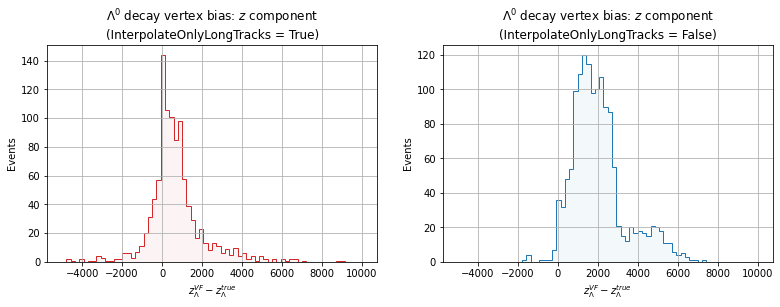

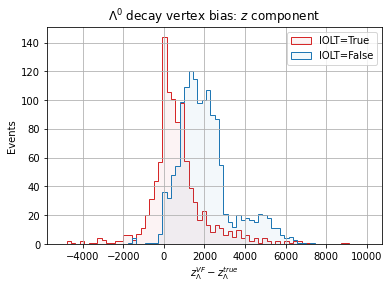

In [15]:
plotArgs = {
    'title': '$\Lambda^0$ decay vertex bias: $z$ component',
    'label': '$z_{\Lambda}^{VF} - z_\Lambda^{true}$',
    'fileName': 'L_ENDVERTEX_Z_bias',
    'binning': 70,
    'boundaries': [-5000,10000],
    'normalized': False
}

PlotPairedHistograms(
    *[
        df['L_ENDVERTEX_Z'] - df['MCTRUTH_L_ENDVERTEX_Z']
    for df in [df_true, df_false]],
    **plotArgs
)

PlotOverlappingHistograms(
    *[
        df['L_ENDVERTEX_Z'] - df['MCTRUTH_L_ENDVERTEX_Z']
    for df in [df_true, df_false]],
    **plotArgs
)